<a href="https://colab.research.google.com/github/guiaf04/ResumeAI/blob/main/ResumeAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configuração de Ambiente**



## Instalação de bibliotecas necessárias para funcionamento do código

In [ ]:
!pip install -q -U google-generativeai
!pip install -q -U PyPDF2
!pip install markdown-pdf

## Importação das bibliotecas necessárias para funcionamento do código

In [21]:
# Bibliotecas para lidar com pdfs
import PyPDF2                                 #ler um pdf
from markdown_pdf import MarkdownPdf, Section #escrever um pdf

# Usadas para gerar o modelo de IA e acessar os arquivos do collab
import google.generativeai as genai
from google.colab import userdata
from google.colab import files

# Formatador de markdown
from IPython.display import Markdown
from IPython.display import display
import textwrap

# Obtendo a API KEY

### IMPORTANTE !
  * Para funcionamento do código, é necessário gerar sua API KEY:
    * Acesse https://aistudio.google.com/app/apikey e clique em "Create API Key"
  * Após isso, acesse os secrets do collab, crie uma nova chave com o nome GOOGLE_API_KEY e no valor, coloque o valor gerado no passo anterior
  * Deixa ela com acesso ao notebook
  Exemplo:

  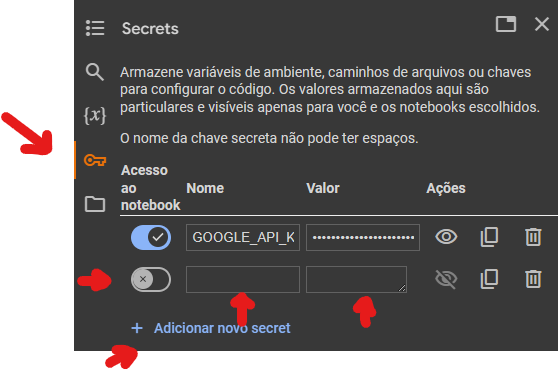


In [46]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# Configuração do modelo do gemini

## Variáveis do modelo

In [49]:
safety_settings = {
    "HARASSMENT"  : "BLOCK_NONE",
    "HATE"        : "BLOCK_NONE",
    "SEXUAL"      : "BLOCK_NONE",
    "DANGEROUS"   : "BLOCK_NONE"
}

generation_config = {
    "candidate_count" :  1,
    "temperature"     :  0.5,
}

system_instruction = "Voce é um sistema de auxilio nos estudos. Você deve gerar um resumo baseado no arquivo entregue e Perguntas com Respostas simples para revisão, separando sempre os conteúdos na forma : Dois títulos, sendo eles a parte do resumo e a outra a parte das perguntas e respostas, Tópicos como subtítulos, colocando apenas o nome do tópico, eliminando o número dele caso tenha, e Resumo dos Tópicos como bullet points. Caso o resumo de um tópico tenha bastante conteúdo, coloque bullet points dentro de outros para resumir de forma mais precisa o conteúdo"

## Ativação do modelo

In [50]:
model = genai.GenerativeModel(model_name='gemini-1.5-pro-latest',
                              generation_config= generation_config,
                              safety_settings=safety_settings,
                              system_instruction=system_instruction)

# Funções utilizadas no código

## Funções que lidam com pdf
* def get_pdfs_content(pdf_docs):
  * Recebeo arquivo pdf e retorna o texto contido nele
  <br> </br>
* def generate_pdf(pdf_title, pdf_content):
  * Recebe o título do pdf e conteúdo a ser inscrito e gera um pdf com o conteúdo passado

In [54]:
def get_pdfs_content(pdf_docs):
  text=""
  for pdf in pdf_docs:
    pdf_reader = PyPDF2.PdfReader(pdf)
    for page in pdf_reader.pages:
      text += page.extract_text()
  return text

def generate_pdf(pdf_title, pdf_content):
  pdf = MarkdownPdf(toc_level=0)
  pdf.add_section(Section(pdf_content, paper_size="A4-L"))
  pdf.meta["title"] = f"Resumo de {pdf_title}"
  pdf.meta["author"] = "Gerado por ResumeAI"
  pdf.save("ResumeAI.pdf")

## Função que lidam com arquivos no collab

In [52]:
def file_upload():
  uploaded = files.upload()
  return uploaded.keys()

def download_file():
  print("Resumo gerado! Você deseja baixar o resumo no formato de pdf? Digite sim para baixá-lo")
  resposta = input()
  if resposta.lower() == "sim":
    files.download("ResumeAI.pdf")

## Função para formatar o texto

In [ ]:
def to_markdown(text):
    text = text.replace('.', '\n')
    return Markdown(textwrap.indent(text, '>', predicate=lambda _: True))

# Parte principal do código
* Aqui é realizado as operações do código para gerar o resumo e criar o pdf requisitado

In [55]:
print("Envie o arquivo que você deseja ter o resumo")
file_name = file_upload()

if file_name != None:
  file_content = get_pdfs_content(file_name)
  if file_content != None:
    chat = model.start_chat()
    response = chat.send_message("Com base no arquivo fornecido, gere um resumo do assunto: " + file_content)
    display(to_markdown(f"**Resposta assistente**: {response.text}"))
    generate_pdf(file_name, response.text)

download_file()

Envie o arquivo que você deseja ter o resumo


Saving Padrões de Projeto - ES.pdf to Padrões de Projeto - ES.pdf


>**Resposta assistente**: ## Resumo do Assunto: Princípios de Projeto
>
>### Introdução 
>* Projeto de software busca decompor problemas complexos em partes menores e independentes
>
>* Abstrações simplificam a interação com entidades complexas
>
>* O objetivo é criar partes abstratas, com implementação complexa apenas para os desenvolvedores responsáveis, mas uso simples para os demais
>
>
>### Integridade Conceitual
>* Um sistema não deve ser um amontoado de funcionalidades, mas sim um conjunto coeso e coerente
>
>* Facilita o uso e entendimento do sistema
>
>* A falta de integridade conceitual adiciona complexidade acidental
>
>* Aplica-se tanto à interface do usuário quanto ao design e código do sistema
>
>* Decisões importantes de projeto não devem ser tomadas por grandes comitês, para evitar sistemas sobrecarregados
>
>
>### Ocultamento de Informação
>* Classes devem esconder decisões de projeto sujeitas a mudanças, como detalhes de implementação
>
>* Atributos e métodos encapsulados são declarados como privados
>
>* Interfaces (métodos públicos) devem ser estáveis para evitar impacto em clientes
>
>*  Benefícios:
>    * Desenvolvimento em paralelo
>    * Flexibilidade a mudanças
>    * Facilidade de entendimento
>
>### Coesão
>* Classes devem implementar uma única funcionalidade ou serviço
>
>* Todos os métodos e atributos devem estar relacionados à mesma responsabilidade
>
>* Benefícios:
>    * Facilita a implementação, entendimento e manutenção da classe
>
>    * Facilita a alocação de um único responsável pela manutenção
>
>    * Facilita o reúso e teste da classe
>
>
>### Acoplamento
>* Mede a força da conexão entre duas classes
>
>    * **Acoplamento aceitável:**
>        * A classe A usa apenas métodos públicos da classe B
>
>        * A interface de B é estável
>
>    * **Acoplamento ruim:**
>        * Mudanças em B impactam facilmente A
>
>        * Ocorre quando:
>            * A classe A acessa diretamente arquivos ou banco de dados de B
>
>            * A e B compartilham variáveis ou estruturas de dados globais
>
>            * A interface de B é instável
>
>
>### SOLID e Outros Princípios de Projeto
>* **Princípio da Responsabilidade Única:**
>    * Uma classe deve ter apenas uma responsabilidade, ou seja, um único motivo para ser modificada
>
>    * Corolário: separar apresentação de regras de negócio
>
>* **Princípio da Segregação de Interfaces:**
>    * Interfaces devem ser pequenas, coesas e específicas para cada tipo de cliente
>
>    * Evitar que clientes dependam de métodos que não usarão
>
>* **Princípio de Inversão de Dependências:**
>    * Clientes devem depender de abstrações (interfaces) e não de implementações concretas (classes)
>
>    * Abstrações são mais estáveis que implementações
>
>* **Prefira Composição a Herança:**
>    * Herança introduz forte acoplamento entre subclasses e superclasses
>
>    * Composição oferece maior flexibilidade e encapsulamento
>
>* **Princípio de Demeter:**
>    * Métodos devem interagir apenas com:
>        * Métodos da própria classe
>
>        * Objetos recebidos como parâmetros
>
>        * Objetos criados pelo próprio método
>
>        * Atributos da classe do método
>
>    * Evitar violações de encapsulamento e dependências desnecessárias
>
>* **Princípio Aberto/Fechado:**
>    * Classes devem ser fechadas para modificações, mas abertas para extensões
>
>    * Flexibilidade e extensibilidade sem modificar o código fonte
>
>* **Princípio de Substituição de Liskov:**
>    * Redefinições de métodos em subclasses não devem violar o contrato da implementação original
>
>    * Garantir que a substituição de objetos de subclasses por objetos da classe base não cause impacto no comportamento do cliente
>
>
>### Métricas de Código Fonte
>* Quantificam propriedades de um projeto de forma objetiva, usando valores numéricos
>
>* **Tamanho:**
>    * Linhas de código (LOC)
>
>    * Número de métodos, atributos, classes e pacotes
>
>* **Coesão:**
>    * LCOM (Lack of Cohesion Between Methods)
>
>    * Mede a falta de coesão, quanto maior o valor, pior a coesão
>
>* **Acoplamento:**
>    * CBO (Coupling Between Objects)
>
>    * Mede o acoplamento estrutural, contando o número de classes das quais uma classe depende
>
>* **Complexidade:**
>    * Complexidade Ciclomática (CC)
>
>    * Mede a complexidade de um método, quanto maior o valor, mais complexo o código
>
>
>---
>
>## Perguntas e Respostas
>
>### Introdução
>* **O que é projeto de software?**
>    * É a decomposição de um problema complexo em partes menores e independentes
>
>* **Qual a importância das abstrações em projeto de software?**
>    * Simplificam a interação com entidades complexas, escondendo detalhes de implementação
>
>
>### Integridade Conceitual
>* **O que é integridade conceitual?**
>    * É a coerência e coesão entre as funcionalidades de um sistema
>
>* **Quais os benefícios da integridade conceitual?**
>    * Facilita o uso e entendimento do sistema, tanto para usuários quanto para desenvolvedores
>
>
>### Ocultamento de Informação
>* **O que é ocultamento de informação?**
>    * É o encapsulamento de detalhes de implementação que são suscetíveis a mudanças
>
>* **Quais os benefícios do ocultamento de informação?**
>    * Desenvolvimento em paralelo, flexibilidade a mudanças e facilidade de entendimento
>
>
>### Coesão
>* **O que é coesão?**
>    * É a medida de quanto os métodos e atributos de uma classe estão relacionados à mesma responsabilidade
>
>* **Quais os benefícios de uma classe coesa?**
>    * Facilita a implementação, entendimento, manutenção, reúso e teste da classe
>
>
>### Acoplamento
>* **O que é acoplamento?**
>    * É a força da conexão entre duas classes
>
>* **Quais os tipos de acoplamento?**
>    * Acoplamento aceitável (baseado em interfaces estáveis) e acoplamento ruim (não mediado por interfaces)
>
>
>### SOLID e Outros Princípios de Projeto
>* **Cite os princípios SOLID
>**
>    * Responsabilidade Única, Segregação de Interfaces, Inversão de Dependências, Prefira Composição a Herança, Aberto/Fechado
>
>* **Qual o objetivo do Princípio de Demeter?**
>    * Evitar violações de encapsulamento e dependências desnecessárias, restringindo a interação entre métodos
>
>* **O que o Princípio de Substituição de Liskov garante?**
>    * Que a substituição de objetos de subclasses por objetos da classe base não cause impacto no comportamento do cliente
>
>
>### Métricas de Código Fonte
>* **Qual a métrica mais comum para medir o tamanho do código?**
>    * Linhas de código (LOC)
>
>* **O que a métrica LCOM mede?**
>    * A falta de coesão entre os métodos de uma classe
>
>* **O que a métrica CBO mede?**
>    * O acoplamento estrutural entre classes, contando o número de dependências
>
>* **O que a Complexidade Ciclomática mede?**
>    * A complexidade de um método, baseada no número de comandos de decisão
> 


Resumo gerado! Você deseja baixar o resumo no formato de pdf? Digite sim para baixá-lo
sim


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>